<a href="https://colab.research.google.com/github/rulocastellanos/practice_data_science_ml/blob/main/Adult_income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Based on: https://www.youtube.com/watch?v=dhoKFqhVJu0

Dataset: https://www.kaggle.com/datasets/wenruliu/adult-income-dataset


In [1]:
import pandas as pd
import numpy as np


In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/adult.csv')
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [25]:
#Exploring the education column
df.education.value_counts()

,count
education,
HS-grad,15784
Some-college,10878
Bachelors,8025
Masters,2657
Assoc-voc,2061
11th,1812
Assoc-acdm,1601
10th,1389
7th-8th,955


In [5]:
df.workclass.value_counts()

,count
workclass,
Private,33906
Self-emp-not-inc,3862
Local-gov,3136
?,2799
State-gov,1981
Self-emp-inc,1695
Federal-gov,1432
Without-pay,21
Never-worked,10


We want to do **One Hot Encoding:**. For each unique value in the original categorical column, a new column is created in this method.


This method is good when we have more than 2 categories. When we have 2 (male, female) it is easier to transform it to binomial.

In [32]:
#We are going to do one hot encoding but with a prefix because we have '?' as a category pf two variables
df = pd.concat([df.drop('occupation', axis=1),
                pd.get_dummies(df.occupation, prefix='occupation', dtype=int)],
               axis=1)

df

,age,workclass,fnlwgt,education,educational-num,marital-status,relationship,race,gender,capital-gain,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,Private,226802,11th,7,Never-married,Own-child,Black,Male,0,...,0,0,1,0,0,0,0,0,0,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Husband,White,Male,0,...,0,0,0,0,0,0,1,0,0,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Husband,Black,Male,7688,...,0,0,1,0,0,0,0,0,0,0
4,18,?,103497,Some-college,10,Never-married,Own-child,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Wife,White,Female,0,...,0,0,0,0,0,0,0,0,1,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Husband,White,Male,0,...,0,0,1,0,0,0,0,0,0,0
48839,58,Private,151910,HS-grad,9,Widowed,Unmarried,White,Female,0,...,0,0,0,0,0,0,0,0,0,0
48840,22,Private,201490,HS-grad,9,Never-married,Own-child,White,Male,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df = df.drop('education', axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, prefix='workclass_', dtype=int)], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], prefix='marital-status_', dtype=int)], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, prefix='relationship_', dtype=int)], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df['race'], prefix='race_', dtype=int)], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], prefix='native-country_', dtype=int)], axis=1)
df


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
0,25,226802,7,Male,0,0,40,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,Male,0,0,50,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,Male,7688,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,Female,0,0,30,<=50K,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,Male,0,0,40,>50K,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,Female,0,0,40,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,Male,0,0,20,<=50K,0,1,...,0,0,0,0,0,0,0,1,0,0


In [34]:
#Econde the already binomial categories

df.gender = df.gender.apply(lambda x: 1 if x == 'Male' else 0)
df.income = df.income.apply(lambda x: 1 if x == '>50K' else 0)
df


,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
0,25,226802,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,89814,9,1,0,0,50,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,336951,12,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,160323,10,1,7688,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,103497,10,0,0,0,30,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,151910,9,0,0,0,40,0,0,1,...,0,0,0,0,0,0,0,1,0,0
48840,22,201490,9,1,0,0,20,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [29]:
#We have know a lot of variables (92!)
df.columns.values

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'income', 'occupation_?',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'workclass__?', 'workclass__Federal-gov', 'workclass__Local-gov',
       'workclass__Never-worked', 'workclass__Private',
       'workclass__Self-emp-inc', 'workclass__Self-emp-not-inc',
       'workclass__State-gov', 'workclass__Without-pay',
       'marital-status__Divorced', 'marital-status__Married-AF-spouse',
       'marital-status__Married-civ-spouse',
       'marital-status__Married-spouse-absent',

We have a lot of of columns. Let's take away the ones that have lesss categories.

<Axes: >

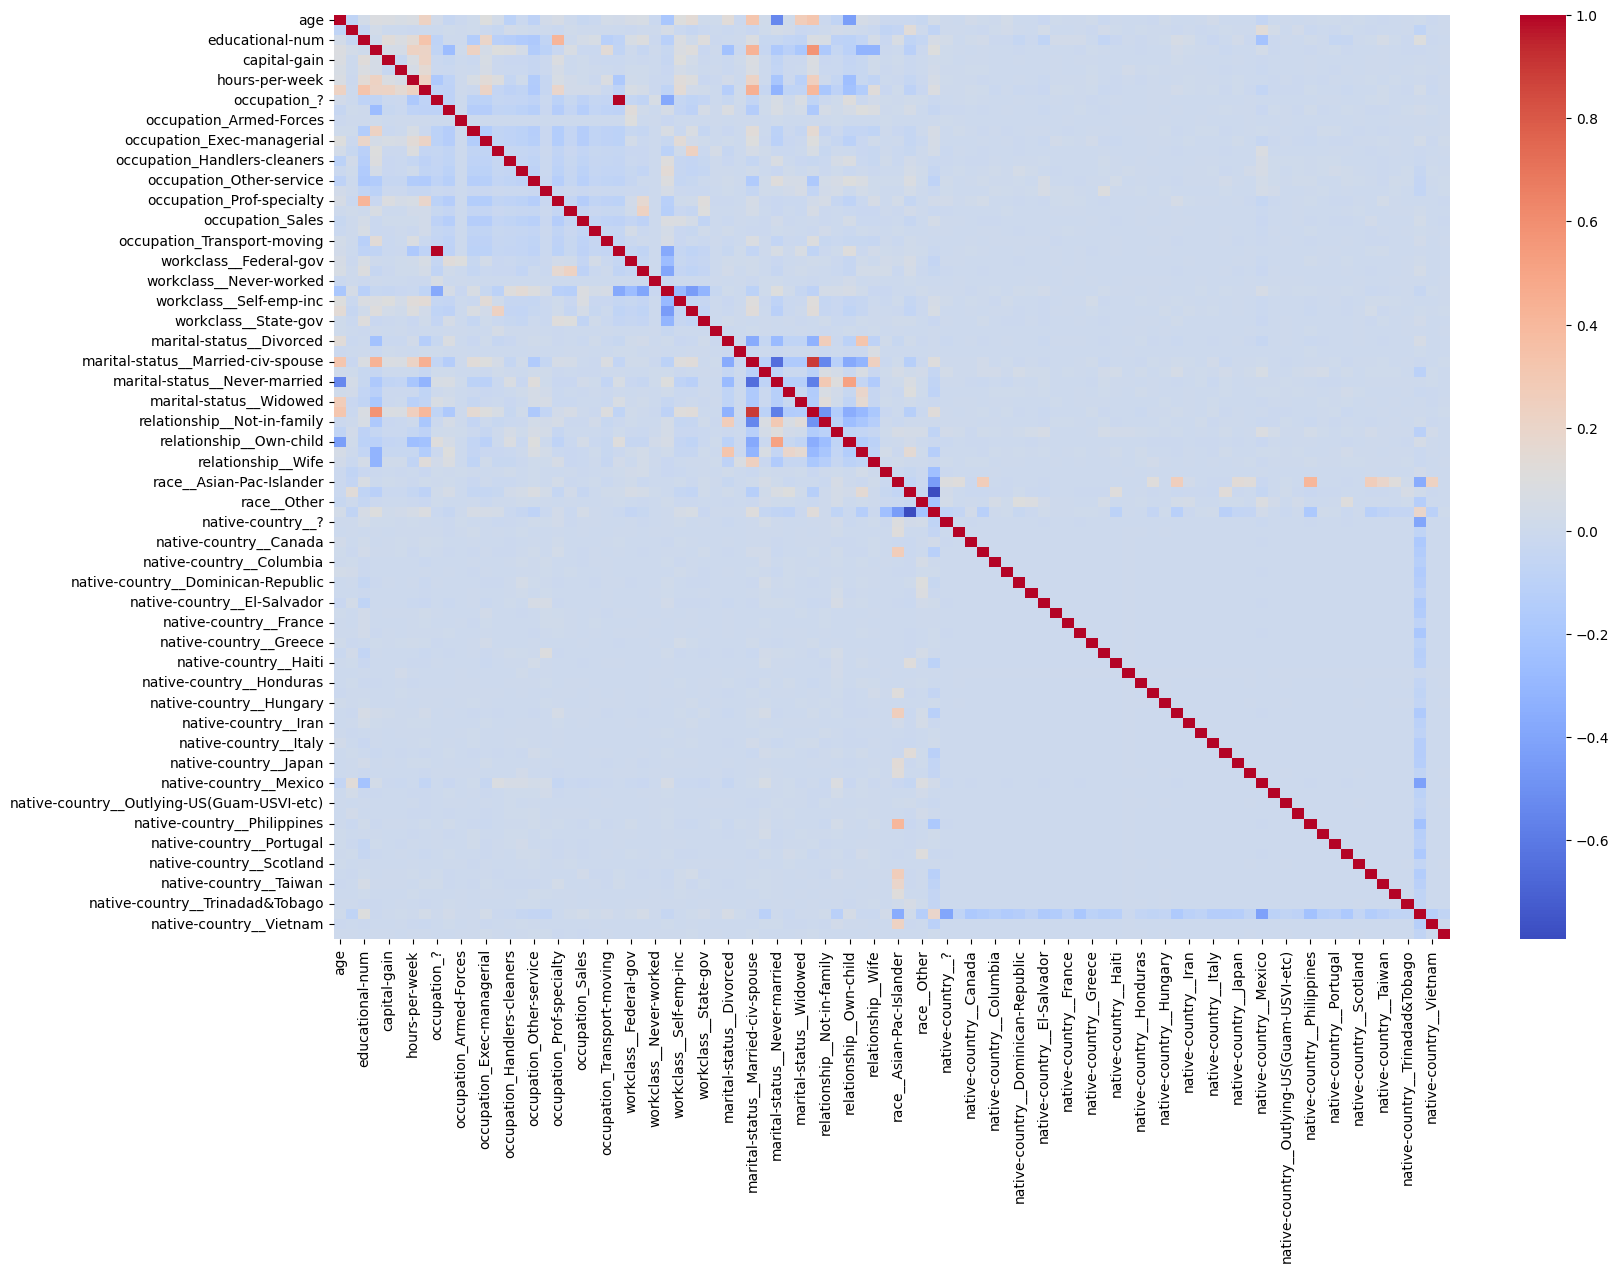

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(), annot= False, cmap = 'coolwarm')

In [37]:
#Filtering for the ones that are indeed corrrelated

correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_drop = df.drop(cols_to_drop, axis = 1)

In [38]:
df_drop

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass__Self-emp-inc,marital-status__Divorced,marital-status__Married-civ-spouse,marital-status__Never-married,relationship__Husband,relationship__Not-in-family,relationship__Own-child,relationship__Unmarried,relationship__Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

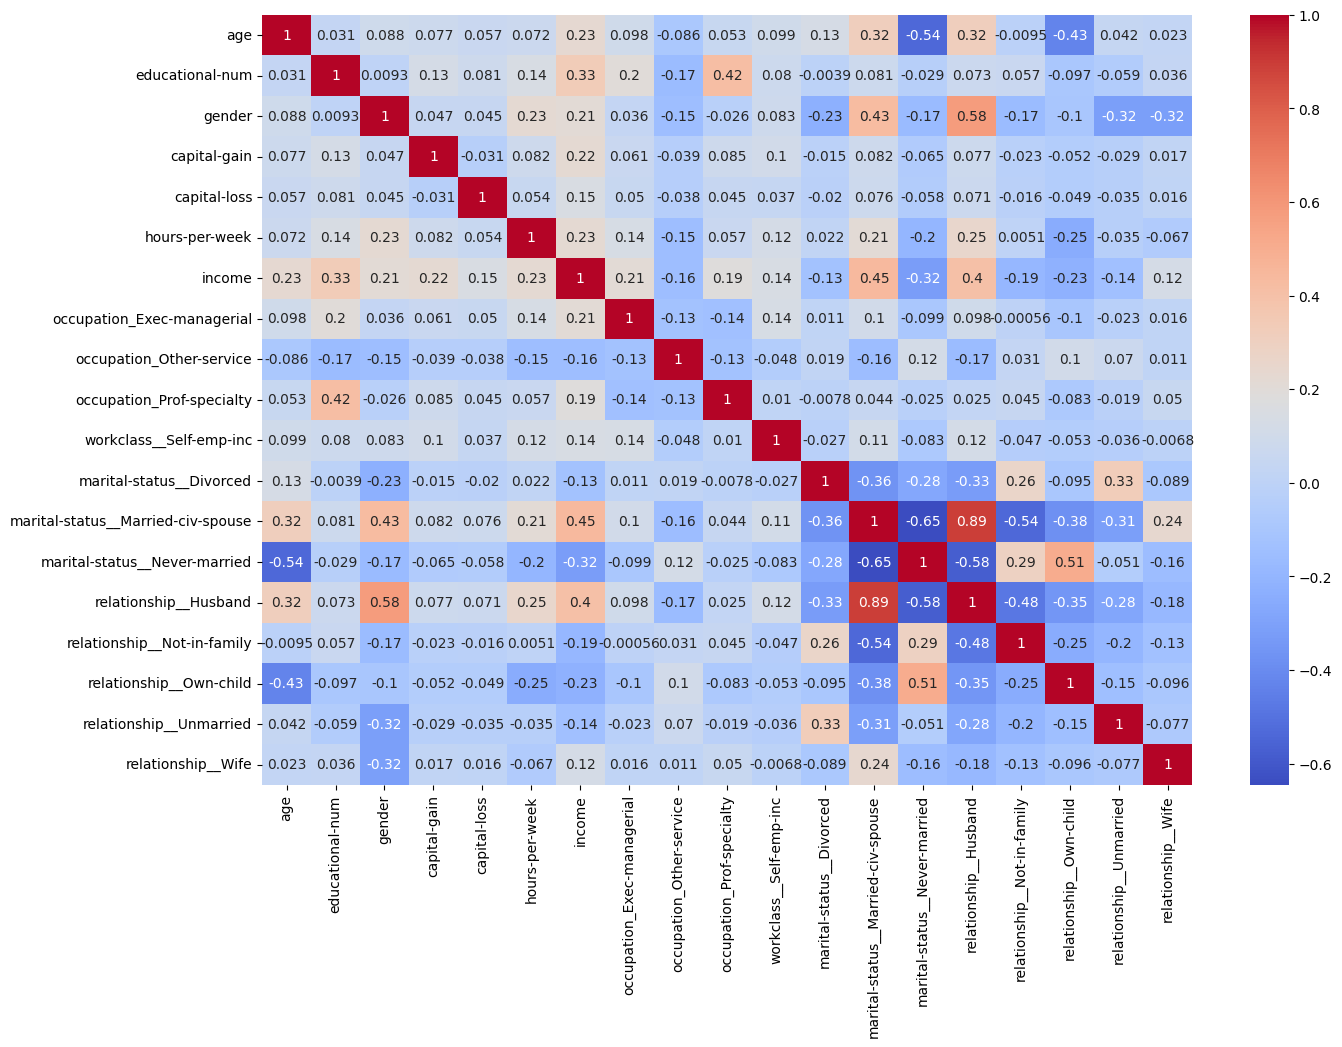

In [42]:
#We can see that being married and being old and being educated is affecting the income
#Also the gender

plt.figure(figsize=(15, 10))
sns.heatmap(df_drop.corr(), annot= True, cmap = 'coolwarm')

We are going to do a **Random Forest Classifier** A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

We are going to use it because we have a lot of decision-like columns. We have a lot of binary variables ('Yes', 'no').  

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

#drop the column fnlwgt
df = df.drop('fnlwgt', axis = 1)

train_df, test_df = train_test_split(df, test_size = 0.2)

In [56]:
train_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
45175,25,10,0,2174,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
43720,38,13,1,15024,0,65,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17660,32,13,0,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,32,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32317,28,14,0,0,0,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10788,20,10,0,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
40876,28,9,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17054,37,11,0,0,0,24,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5709,31,9,0,0,0,8,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
test_df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country__Portugal,native-country__Puerto-Rico,native-country__Scotland,native-country__South,native-country__Taiwan,native-country__Thailand,native-country__Trinadad&Tobago,native-country__United-States,native-country__Vietnam,native-country__Yugoslavia
34283,25,9,1,0,0,35,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27897,52,10,1,0,0,45,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
22565,41,9,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
17478,59,14,1,0,0,55,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21992,43,9,1,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28736,56,4,0,5013,0,45,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2132,39,9,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
24802,61,6,0,0,0,24,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
38884,20,10,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
#Create X and y in train and test
train_X = train_df.drop('income', axis = 1 )
train_y = train_df.income

test_X = test_df.drop('income', axis = 1 )
test_y = test_df.income

In [59]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [60]:
forest.score(test_X, test_y)

0.8488074521445389

In [61]:
#Check the importance of each feature

forest.feature_importances_

array([2.30344441e-01, 1.28191753e-01, 1.33273149e-02, 1.15580720e-01,
       3.63159470e-02, 1.13626209e-01, 1.80239148e-03, 4.97863738e-03,
       9.36445261e-05, 5.78050129e-03, 2.05412007e-02, 4.09484107e-03,
       3.53067663e-03, 3.84197680e-03, 7.36283220e-03, 1.73033702e-04,
       1.63350040e-02, 2.82160881e-03, 6.17272044e-03, 4.17536876e-03,
       4.50525370e-03, 1.80755929e-03, 4.90065783e-03, 5.32774321e-03,
       1.47195169e-06, 9.40505635e-03, 6.55195451e-03, 7.93914298e-03,
       4.37218924e-03, 1.30637177e-04, 6.48373901e-03, 2.92401814e-04,
       6.27239606e-02, 1.01859000e-03, 1.94028706e-02, 1.83120855e-03,
       1.76834239e-03, 5.88587147e-02, 1.15902045e-02, 1.99110307e-03,
       9.09661031e-03, 5.07726040e-03, 1.15470526e-02, 1.38815659e-03,
       3.14089280e-03, 4.93119358e-03, 8.97622978e-04, 6.19085758e-03,
       2.61500603e-03, 2.64329004e-04, 1.38304928e-03, 5.76377222e-04,
       2.78904132e-04, 8.14612439e-04, 2.20593467e-04, 2.26149608e-04,
      

In [62]:
# Check how the feautures influence the ressults
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),
                                       key = lambda x: x[1], reverse = True )}
importances

{'age': 0.23034444118149433,
 'educational-num': 0.1281917530075179,
 'capital-gain': 0.11558071958186025,
 'hours-per-week': 0.1136262087869823,
 'marital-status__Married-civ-spouse': 0.06272396058934444,
 'relationship__Husband': 0.05885871466645152,
 'capital-loss': 0.03631594696917145,
 'occupation_Exec-managerial': 0.02054120074304966,
 'marital-status__Never-married': 0.019402870605744645,
 'occupation_Prof-specialty': 0.016335004012932083,
 'gender': 0.013327314905768781,
 'relationship__Not-in-family': 0.011590204464613651,
 'relationship__Wife': 0.01154705255164724,
 'workclass__Private': 0.009405056351247101,
 'relationship__Own-child': 0.00909661031169521,
 'workclass__Self-emp-not-inc': 0.007939142978538065,
 'occupation_Other-service': 0.007362832201253428,
 'workclass__Self-emp-inc': 0.0065519545074992054,
 'marital-status__Divorced': 0.006483739006822349,
 'native-country__United-States': 0.006260991241999502,
 'race__White': 0.006190857576807587,
 'occupation_Sales': 0.

**Hyperparameter tuning** is the process of selecting the optimal values for a machine learning model’s hyperparameters. Hyperparameters are settings that control the learning process of the model, such as the learning rate, the number of neurons in a neural network, or the kernel size in a support vector machine.

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {

              'n_estimators' : [50, 100, 250],
              'max_depth': [5, 10, 30, None],
              'min_samples_split' : [2, 4],
              'max_features' : ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid= param_grid,
                           verbose = 10
)

grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   1.0s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.839 total time=   1.1s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.835 total time=   1.3s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.833 total time=   2.1s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [67]:
forest = grid_search.best_estimator_
forest.score(test_X, test_y)

0.8639574163169209

In [68]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(),
                                       key = lambda x: x[1], reverse = True )}
importances

{'age': 0.13823520260271163,
 'capital-gain': 0.13336645286587914,
 'educational-num': 0.12889282459632612,
 'marital-status__Married-civ-spouse': 0.1000974580622574,
 'hours-per-week': 0.08651401376275984,
 'relationship__Husband': 0.05348571428169366,
 'capital-loss': 0.04244758425467327,
 'marital-status__Never-married': 0.04078337559483105,
 'occupation_Exec-managerial': 0.027332203732580943,
 'occupation_Prof-specialty': 0.022537117510065582,
 'gender': 0.018058785519556718,
 'relationship__Not-in-family': 0.015692295756600045,
 'relationship__Own-child': 0.013178373445186345,
 'relationship__Wife': 0.010546716006274135,
 'occupation_Other-service': 0.010506978534389857,
 'marital-status__Divorced': 0.010172623691833462,
 'relationship__Unmarried': 0.009763967612093735,
 'workclass__Self-emp-inc': 0.008562403898493144,
 'workclass__Self-emp-not-inc': 0.008083372634211184,
 'workclass__Private': 0.007988318654586568,
 'occupation_Craft-repair': 0.005920948872125818,
 'native-countr